In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
R=0.2
L=1
e=1
h=0.1

In [53]:
def Sol_exac(t):
    return (e/R)*(1-np.e**(-(R/L)*t))

def f(i,t):
    return e/L-(R/L)*i

def f_prima1(i,t):
    return -(R/L)*(e/L-R/L*i)


In [56]:
t=np.arange(0,50+h,h)
t_prima=np.arange(0,50)
t_0=0
i_0=0


i=np.zeros(len(t))
i[0]=i_0
for n in range(0,len(t)-1):
    i[n+1]=i[n]+f(i[n],t[n])*h+0.5*f_prima1(i[n],t[n])*(h**2)


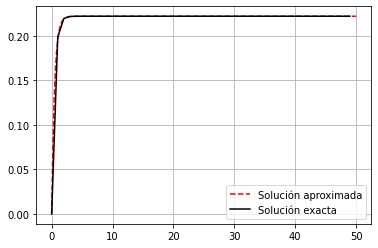

In [57]:
plt.plot(t,i,'r--',label="Solución aproximada")
plt.plot(t_prima,Sol_exac(t_prima),'k',label="Solución exacta")
plt.legend()
plt.grid()
plt.show()

CIRCUITO RLC

Primer conjunto de constantes:

In [84]:
E=1
L=2
C=0.5
R=4.5
h=0.2

In [85]:
f_prima= lambda i,q: (E/L)-(R/L)*i-q/(C*L)
f_dosP= lambda i,q: -(1/(L*C))*i-(R/L)*(E/L-(R/L)*i-(q/(C*L)))
f=lambda i: i

In [86]:
t=np.arange(0,50+h,h)
t_0=0
i_0=0
q_0=0

i=np.zeros(len(t))
q=np.zeros(len(t))
i[0]=i_0
q[0]=q_0

for m in range(0,len(t)-1):
    q[m+1]=q[m]+i[m]*h+0.5*f_prima(i[m],q[m])*(h**2)
    i[m+1]=i[m]+f_prima(i[m],q[m])*h+0.5*f_dosP(i[m],q[m])*(h**2)

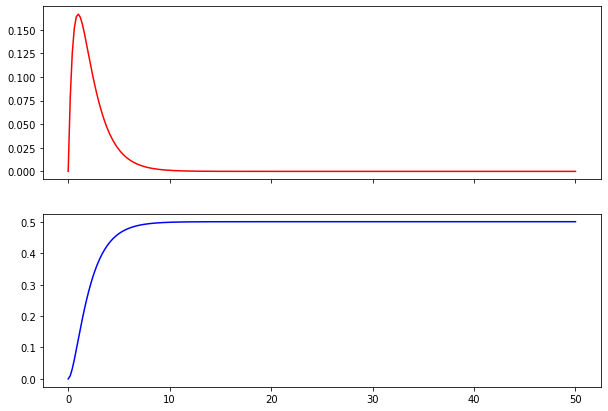

In [87]:
fig,ax=plt.subplots(2,sharex=True,figsize=(10,7))
ax[0].plot(t,i,'r',label="Corriente")
ax[1].plot(t,q,'b',label="Carga")
plt.show()

In [83]:
def RLC(i_0,q_0,E,R,L,C,h):
    f_prima= lambda i,q: (E/L)-(R/L)*i-q/(C*L)
    f_dosP= lambda i,q: -(1/(L*C))*i-(R/L)*(E/L-(R/L)*i-(q/(C*L)))
    f=lambda i: i
    
    t=np.arange(0,50+h,h)
    t_0=0

    i=np.zeros(len(t))
    q=np.zeros(len(t))
    i[0]=i_0
    q[0]=q_0

    for m in range(0,len(t)-1):
        q[m+1]=q[m]+i[m]*h+0.5*f_prima(i[m],q[m])*(h**2)
        i[m+1]=i[m]+f_prima(i[m],q[m])*h+0.5*f_dosP(i[m],q[m])*(h**2)
    return (t,q,i)

In [102]:
R_array=np.array([4.5,2.5,0.5,1/16,0])
A=[RLC(0,0,1,R_array[i],2,0.5,0.2) for i in range(0, len(R_array))]

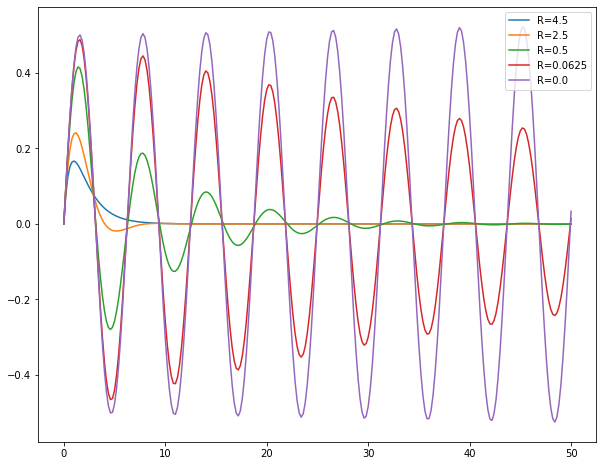

In [104]:
fig=plt.figure(figsize=(10,8))
for i in range(0,len(R_array)):
    plt.plot(A[i][0],A[i][2],label="R={}".format(R_array[i]))
plt.legend()
plt.show()

In [117]:
L_array=[10,8,4,1,1/2]
B=[RLC(0,0,1,4.5,L_array[i],0.5,0.2) for i in range(0, len(L_array))]

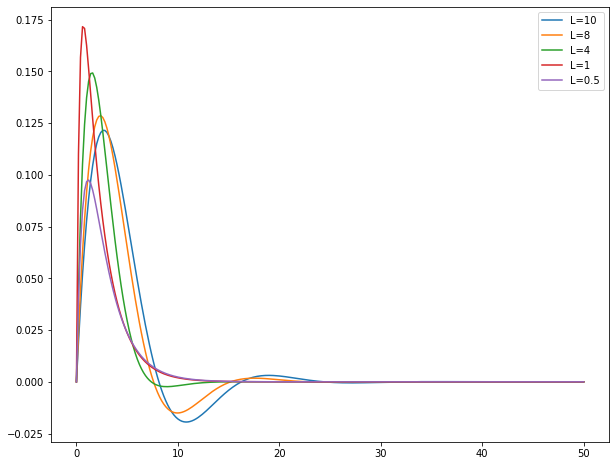

In [119]:
fig=plt.figure(figsize=(10,8))
for i in range(0,len(L_array)):
    plt.plot(B[i][0],B[i][2],label="L={}".format(L_array[i]))
plt.legend()
plt.show()